In [1]:
#Pergunta: O acesso à informação varia entre as regiões do Brasil? A renda média por domicílio influencia esse resultado?

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gb_pa\Downloads


In [2]:
dados = pd.read_excel('NewDOM2015.xlsx')

In [3]:
dados2 = dados.loc[:,['Column3','Column29','Column35','Column36','Column78']]

In [4]:
#dados2.Column3 = dados.Column3.astype('category')
#dados2.Column3.cat.categories = (11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53,'UF')
#11:Rondônia #12:Acre #13:Amazonas #14:Roraima #15:Pará #16:Amapá #17:Tocantins #21:Maranhão #22:Piauí #23:Ceará #24:RN #25:Paraíba
#26:Pernambuco #27:Alagoas #28:Sergipe #29:Bahia #31:MG #32:ES #33:RJ #35:SP #41:Paraná #42:SC #43:RS #50:MS #51:MT #52:GO #53:DF
#UF:UF

In [5]:
dados2.Column29 = dados.Column29.astype('category')
dados2.Column29.cat.categories = ('Sim', 'Não','V0220')

In [6]:
dados2.Column35 = dados.Column35.astype('category')
dados2.Column35.cat.categories = ('Sim', 'Não','V0225')

In [7]:
dados2.Column36 = dados.Column36.astype('category')
dados2.Column36.cat.categories = ('Sim', 'Não','V0226')
dados2.head()

,Column3,Column29,Column35,Column36,Column78
0,UF,V0220,V0225,V0226,V4621
1,11,Sim,Não,Sim,800.0
2,11,NaN,NaN,NaN,NaN
3,11,Sim,Não,Não,1150.0
4,11,Sim,Sim,Sim,793.0


In [8]:
dados2.columns = ['UF','Tem Celular','Tem Rádio','Tem Televisão em Cores','RM domiciliar per capita']

In [9]:
dados3 = dados2.dropna(how='any')

In [10]:
dados4 = dados3.iloc[1:,:]

In [11]:
dados4['UF'] = dados4['UF'].astype('int')

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
dados4.dtypes

UF                             int32
Tem Celular                 category
Tem Rádio                   category
Tem Televisão em Cores      category
RM domiciliar per capita      object
dtype: object

In [13]:
dados4.to_csv('Projeto1.csv')

In [14]:
#dados4.UF.cat.categories = ('Norte','Norte','Norte','Norte','Norte','Norte','Norte','NE','NE','NE','NE','NE','NE','NE','NE','NE','SE','SE','SE','SE','Sul','Sul','Sul','CO','CO','CO','CO')
#dados4['UF'] = dados4['UF'].replace({'UF':{'11': 'Norte'}})

def funcao(dados4):
    if dados4.UF >=11 and dados4.UF <= 17:
        return 'Norte'
    if dados4.UF >=20 and dados4.UF <= 29:
        return 'NE'
    if dados4.UF >=30 and dados4.UF <= 35:
        return 'SE'
    if dados4.UF >=40 and dados4.UF <= 43:
        return 'Sul'
    if dados4.UF >=50 and dados4.UF <= 53:
        return 'CO'

dados4['Regiao'] = dados4.apply(funcao, axis=1)

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
dados4.Regiao = dados4.Regiao.astype('category')

C:\Users\gb_pa\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
dados4 = dados4.iloc[:117601,:]

In [17]:
dados5 = dados4[dados4['RM domiciliar per capita']!='999999999999.0']

In [18]:
tabela1 = (pd.crosstab(dados5['RM domiciliar per capita'],dados5['Regiao'],margins=True,rownames=['RM'],colnames=['Regiao']).round(decimals=0))

In [24]:
tabela1.head()

Regiao,CO,NE,Norte,SE,Sul,All
RM,,,,,,
0.0,127,99,58,274,121,679
10.0,0,3,0,1,0,4
100.0,15,142,76,50,21,304
1000.0,266,349,245,729,429,2018
10000.0,30,16,7,74,36,163


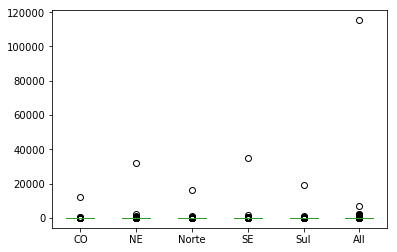

In [20]:
tabela1.plot(kind='box')

In [32]:
dados5['Tem Celular'].value_counts(True) * 100

Sim      91.689217
Não       8.310783
V0220     0.000000
Name: Tem Celular, dtype: float64

In [35]:
pd.crosstab(dados5['Tem Celular'], dados5['Regiao'], normalize=True)

Regiao,CO,NE,Norte,SE,Sul
Tem Celular,,,,,
Sim,0.102467,0.248378,0.126596,0.283696,0.155756
Não,0.004614,0.030469,0.016965,0.021727,0.009333
V0220,0.000000,0.000000,0.000000,0.000000,0.000000


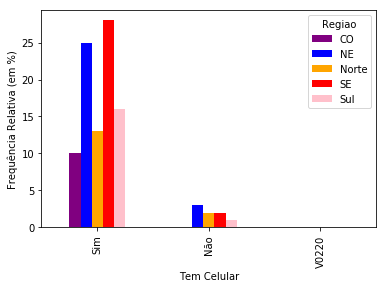

In [47]:
ct2 = pd.crosstab(dados5['Tem Celular'], dados5['Regiao'])
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)
ct2.plot(kind='bar', color=('purple', 'blue','orange','red','pink'))
plt.ylabel('Frequência Relativa (em %)')

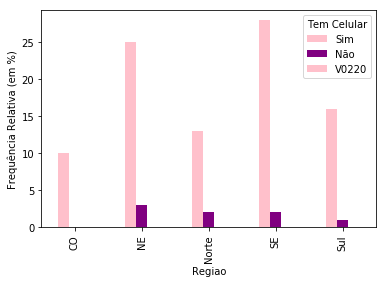

In [42]:
ct2 = pd.crosstab(dados5['Regiao'], dados5['Tem Celular'])
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)
ct2.plot(kind='bar', color=('pink', 'purple'))
plt.ylabel('Frequência Relativa (em %)')

In [23]:
dados4.dtypes

UF                             int32
Tem Celular                 category
Tem Rádio                   category
Tem Televisão em Cores      category
RM domiciliar per capita      object
Regiao                      category
dtype: object

In [ ]:
#dados5.sort_values(by='RM domiciliar per capita')

In [ ]:
dados5.to_csv('Projeto1.csv')